In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel('/home/ataur/Downloads/Dataset_Assignment Clustering_K Means/Telco_customer_churn.xlsx')

In [3]:
df1 = df.copy()

In [4]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [5]:
df.drop(df.columns[[0, 1, 2, 26, 27]], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [7]:
df.duplicated().sum()

0

# Outliers Checking and Treatment

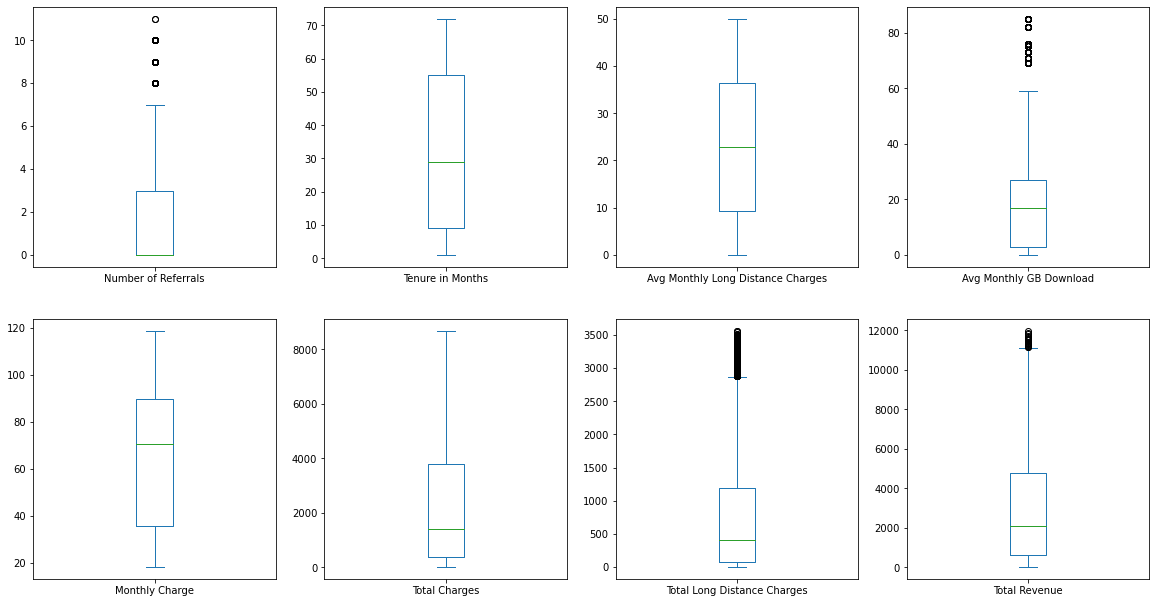

In [8]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,22));

In [9]:
# First column
iqr = df['Number of Referrals'].quantile(0.75) - df['Number of Referrals'].quantile(0.25)
iqr

3.0

In [10]:
lower_limit = df['Number of Referrals'].quantile(0.25) - 1.5*(iqr)
lower_limit

-4.5

In [11]:
upper_limit = df['Number of Referrals'].quantile(0.75) + 1.5*(iqr)

In [12]:
df['Number of Referrals'] = np.where(df['Number of Referrals'] > upper_limit, upper_limit, np.where(df['Number of Referrals'] < lower_limit, lower_limit, df['Number of Referrals']))

In [13]:
# Second column
iqr = df['Avg Monthly GB Download'].quantile(0.75) - df['Avg Monthly GB Download'].quantile(0.25)
iqr

24.0

In [14]:
lower_limit = df['Avg Monthly GB Download'].quantile(0.25) - 1.5*(iqr)
lower_limit

-33.0

In [15]:
upper_limit = df['Avg Monthly GB Download'].quantile(0.75) + 1.5*(iqr)
upper_limit

63.0

In [16]:
df['Avg Monthly GB Download'] = np.where(df['Avg Monthly GB Download'] > upper_limit, upper_limit, np.where(df['Avg Monthly GB Download'] < lower_limit, lower_limit, df['Avg Monthly GB Download']))

In [17]:
# Third column
iqr = df['Total Long Distance Charges'].quantile(0.75) - df['Total Long Distance Charges'].quantile(0.25)
iqr

1120.5549999999998

In [18]:
lower_limit = df['Total Long Distance Charges'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1610.2874999999997

In [19]:
upper_limit = df['Total Long Distance Charges'].quantile(0.75) + 1.5*(iqr)
upper_limit

2871.9325

In [20]:
df['Total Long Distance Charges'] = np.where(df['Total Long Distance Charges'] > upper_limit, upper_limit, np.where(df['Total Long Distance Charges'] < lower_limit, lower_limit, df['Total Long Distance Charges']))

In [21]:
# Sixth column
iqr = df['Total Revenue'].quantile(0.75) - df['Total Revenue'].quantile(0.25)
iqr

4195.535000000001

In [22]:
lower_limit = df['Total Revenue'].quantile(0.25) - 1.5*(iqr)
lower_limit

-5687.692500000002

In [23]:
upper_limit = df['Total Revenue'].quantile(0.75) + 1.5*(iqr)
upper_limit

11094.447500000002

In [24]:
df['Total Revenue'] = np.where(df['Total Revenue'] > upper_limit, upper_limit, np.where(df['Total Revenue'] < lower_limit, lower_limit, df['Total Revenue']))

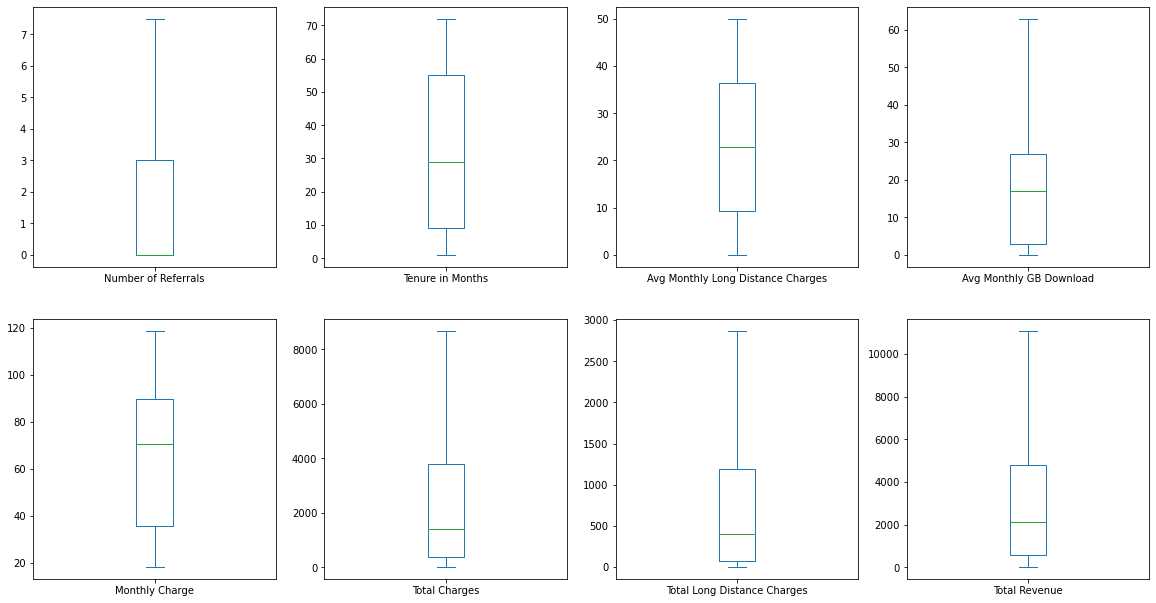

In [25]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,22));

## LabelEncoding

# spiliting the data for encoding

In [26]:
labelencoder = LabelEncoder()

In [27]:
x = df.iloc[:, [0,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20]]
x

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal
1,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card
2,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal
7039,Yes,Offer C,Yes,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check
7040,Yes,None,Yes,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card
7041,Yes,None,No,No,Yes,DSL,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


spliting data are not encoding

In [28]:
y = df.iloc[:, [1,2,5,9,21,22,23,24]]
y

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.0,1,0.00,8.0,39.65,39.65,0.00,59.65
1,1.0,8,48.85,17.0,80.65,633.30,390.80,1024.10
2,0.0,18,11.33,52.0,95.45,1752.55,203.94,1910.88
3,1.0,25,19.76,12.0,98.50,2514.50,494.00,2995.07
4,1.0,37,6.33,14.0,76.50,2868.15,234.21,3102.36
...,...,...,...,...,...,...,...,...
7038,0.0,72,22.77,0.0,21.15,1419.40,1639.44,3039.53
7039,1.0,24,36.05,24.0,84.80,1990.50,865.20,2807.47
7040,4.0,72,29.66,59.0,103.20,7362.90,2135.52,9453.04
7041,1.0,11,0.00,17.0,29.60,346.45,0.00,319.21


In [29]:
# labelEncoding for each column

In [30]:
x['Referred a Friend']=labelencoder.fit_transform(x['Referred a Friend'])
x['Offer']=labelencoder.fit_transform(x['Offer'])
x['Phone Service']=labelencoder.fit_transform(x['Phone Service'])
x['Multiple Lines']=labelencoder.fit_transform(x['Multiple Lines'])
x['Internet Service']=labelencoder.fit_transform(x['Internet Service'])
x['Internet Type']=labelencoder.fit_transform(x['Internet Type'])
x['Online Backup']=labelencoder.fit_transform(x['Online Backup'])
x['Online Security']=labelencoder.fit_transform(x['Online Security'])
x['Device Protection Plan']=labelencoder.fit_transform(x['Device Protection Plan'])
x['Premium Tech Support']=labelencoder.fit_transform(x['Premium Tech Support'])
x['Streaming TV']=labelencoder.fit_transform(x['Streaming TV'])
x['Streaming Movies']=labelencoder.fit_transform(x['Streaming Movies'])
x['Streaming Music']=labelencoder.fit_transform(x['Streaming Music'])
x['Unlimited Data']=labelencoder.fit_transform(x['Unlimited Data'])
x['Contract']=labelencoder.fit_transform(x['Contract'])
x['Paperless Billing']=labelencoder.fit_transform(x['Paperless Billing'])
x['Payment Method']=labelencoder.fit_transform(x['Payment Method'])

<ipython-input-30-1798328b3b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Referred a Friend']=labelencoder.fit_transform(x['Referred a Friend'])
<ipython-input-30-1798328b3b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Offer']=labelencoder.fit_transform(x['Offer'])
<ipython-input-30-1798328b3b70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [31]:
x

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
1,1,5,1,1,1,2,0,1,0,0,0,0,0,1,0,1,1
2,0,4,1,1,1,2,0,0,0,0,1,1,1,1,0,1,0
3,1,3,1,0,1,2,0,1,1,0,1,1,0,1,0,1,0
4,1,3,1,1,1,2,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,0,3,0,0,0,0,0,0,0,0,2,1,0
7039,1,3,1,1,1,0,1,0,1,1,1,1,1,1,1,1,2
7040,1,0,1,1,1,2,0,1,1,0,1,1,1,1,1,1,1
7041,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0


# Normalization on y data

In [32]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   float64
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   float64
 4   Monthly Charge                     7043 non-null   float64
 5   Total Charges                      7043 non-null   float64
 6   Total Long Distance Charges        7043 non-null   float64
 7   Total Revenue                      7043 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 440.3 KB


In [33]:
y

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.0,1,0.00,8.0,39.65,39.65,0.00,59.65
1,1.0,8,48.85,17.0,80.65,633.30,390.80,1024.10
2,0.0,18,11.33,52.0,95.45,1752.55,203.94,1910.88
3,1.0,25,19.76,12.0,98.50,2514.50,494.00,2995.07
4,1.0,37,6.33,14.0,76.50,2868.15,234.21,3102.36
...,...,...,...,...,...,...,...,...
7038,0.0,72,22.77,0.0,21.15,1419.40,1639.44,3039.53
7039,1.0,24,36.05,24.0,84.80,1990.50,865.20,2807.47
7040,4.0,72,29.66,59.0,103.20,7362.90,2135.52,9453.04
7041,1.0,11,0.00,17.0,29.60,346.45,0.00,319.21


In [34]:
y.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.805907,32.386767,22.958954,19.890246,64.761692,2280.381264,740.864881,3033.269913
std,2.661022,24.542061,15.448113,18.822804,30.090047,2266.220462,823.637706,2861.983162
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,21.360000
25%,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,70.545000,605.610000
50%,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,401.440000,2108.640000
75%,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,1191.100000,4801.145000
max,7.500000,72.000000,49.990000,63.000000,118.750000,8684.800000,2871.932500,11094.447500


In [35]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [36]:
y_norm = norm_func(y.iloc[:, :])

In [37]:
y_norm

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.000000,0.000000,0.000000,0.126984,0.212935,0.002406,0.000000,0.003458
1,0.133333,0.098592,0.977195,0.269841,0.620896,0.070909,0.136076,0.090556
2,0.000000,0.239437,0.226645,0.825397,0.768159,0.200063,0.071011,0.170641
3,0.133333,0.338028,0.395279,0.190476,0.798507,0.287988,0.172010,0.268553
4,0.133333,0.507042,0.126625,0.222222,0.579602,0.328796,0.081551,0.278242
...,...,...,...,...,...,...,...,...
7038,0.000000,1.000000,0.455491,0.000000,0.028856,0.161620,0.570849,0.272568
7039,0.133333,0.323944,0.721144,0.380952,0.662189,0.227521,0.301261,0.251611
7040,0.533333,1.000000,0.593319,0.936508,0.845274,0.847461,0.743583,0.851766
7041,0.133333,0.140845,0.000000,0.269841,0.112935,0.037809,0.000000,0.026899


# Joining data for Clustering

In [38]:
xy = pd.concat([x,y_norm], axis=1)

In [39]:
xy

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Paperless Billing,Payment Method,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0,0,0,0,1,1,0,0,1,0,...,1,0,0.000000,0.000000,0.000000,0.126984,0.212935,0.002406,0.000000,0.003458
1,1,5,1,1,1,2,0,1,0,0,...,1,1,0.133333,0.098592,0.977195,0.269841,0.620896,0.070909,0.136076,0.090556
2,0,4,1,1,1,2,0,0,0,0,...,1,0,0.000000,0.239437,0.226645,0.825397,0.768159,0.200063,0.071011,0.170641
3,1,3,1,0,1,2,0,1,1,0,...,1,0,0.133333,0.338028,0.395279,0.190476,0.798507,0.287988,0.172010,0.268553
4,1,3,1,1,1,2,0,0,0,0,...,1,0,0.133333,0.507042,0.126625,0.222222,0.579602,0.328796,0.081551,0.278242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,0,3,0,0,0,0,...,1,0,0.000000,1.000000,0.455491,0.000000,0.028856,0.161620,0.570849,0.272568
7039,1,3,1,1,1,0,1,0,1,1,...,1,2,0.133333,0.323944,0.721144,0.380952,0.662189,0.227521,0.301261,0.251611
7040,1,0,1,1,1,2,0,1,1,0,...,1,1,0.533333,1.000000,0.593319,0.936508,0.845274,0.847461,0.743583,0.851766
7041,1,0,0,0,1,1,1,0,0,0,...,1,0,0.133333,0.140845,0.000000,0.269841,0.112935,0.037809,0.000000,0.026899


In [40]:
xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Offer                              7043 non-null   int64  
 2   Phone Service                      7043 non-null   int64  
 3   Multiple Lines                     7043 non-null   int64  
 4   Internet Service                   7043 non-null   int64  
 5   Internet Type                      7043 non-null   int64  
 6   Online Security                    7043 non-null   int64  
 7   Online Backup                      7043 non-null   int64  
 8   Device Protection Plan             7043 non-null   int64  
 9   Premium Tech Support               7043 non-null   int64  
 10  Streaming TV                       7043 non-null   int64  
 11  Streaming Movies                   7043 non-null   int64

In [41]:
xy.isna().sum()

Referred a Friend                    0
Offer                                0
Phone Service                        0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Charges                        0
Total Long Distance Charges          0
Total Revenue                        0
dtype: int64

# Scree plot

In [42]:
twss = []

In [43]:
k = list(range(2,9))

In [44]:
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(xy)
    twss.append(kmeans.inertia_)

In [45]:
twss

[41368.79199171009,
 35154.579736554144,
 30868.271365563047,
 28731.174120572163,
 26936.151305882744,
 25643.104658964592,
 24807.85570304664]

Text(0, 0.5, 'total_within_ss')

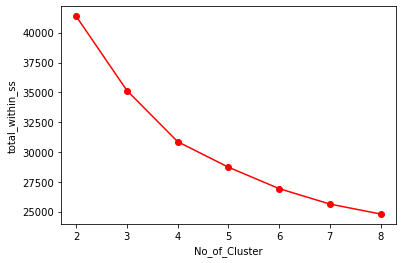

In [46]:
plt.plot(k, twss, 'ro-');plt.xlabel('No_of_Cluster');plt.ylabel('total_within_ss')

In [47]:
model = KMeans(n_clusters= 3)
model.fit(xy)

KMeans(n_clusters=3)

In [48]:
model.labels_

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [49]:
x = pd.Series(model.labels_)

In [50]:
df1['Clust'] = x

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [52]:
df.shape

(7043, 25)

In [54]:
first_column = df1.pop('Clust')

In [55]:
df1.insert(0, 'Clust', first_column)

In [56]:
df1

,Clust,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,2,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,2,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,2,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,2,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,0,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,0,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [58]:
df1.iloc[:,2:].groupby(df1['Clust']).mean()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Clust,,,,,,,,,,,
0,1.0,2.148148,39.386452,22.433865,26.214912,78.953886,3305.834588,2.193431,9.266569,891.162973,4204.070699
1,1.0,2.466783,36.673951,24.776364,0.099650,21.689161,808.221591,1.903383,0.157343,919.978024,1726.453575
2,1.0,1.174930,13.650696,23.001209,20.495822,59.764596,874.080552,1.470942,5.632312,315.386295,1193.628217


In [59]:
df1.iloc[:,2:].groupby(df1['Clust']).median()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Clust,,,,,,,,,,,
0,1.0,1.0,43.0,22.140,21.0,80.775,3132.750,0.0,0.0,557.460,3943.960
1,1.0,1.0,39.0,24.675,0.0,20.200,811.875,0.0,0.0,645.135,1578.045
2,1.0,0.0,11.0,23.040,17.0,64.650,497.600,0.0,0.0,160.600,787.520


In [60]:
df1.iloc[:,2:].groupby(df1['Clust']).std()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Clust,,,,,,,,,,,
0,0.0,3.075693,24.532932,15.729183,19.662559,21.863566,2413.087744,8.313904,29.095104,919.991312,3103.966418
1,0.0,3.294888,24.742619,13.970248,1.260005,5.146771,582.973564,7.824242,3.394669,869.070802,1337.189667
2,0.0,2.437750,11.075699,15.615050,20.279578,27.840195,926.789131,6.905519,22.071604,379.265318,1199.657481
